In [8]:
import pandas as pd
import glob
from sklearn.preprocessing import StandardScaler, LabelEncoder
path = "Journals/Journals/*.xlsx"
data_list = []
file_list = []
all_files = glob.glob(path)

for file in all_files:
    excel_file = pd.ExcelFile(file)
    sheet_names = excel_file.sheet_names
    for i in range(len(sheet_names)):
        
        data = pd.read_excel(file, sheet_name=sheet_names[i], engine='xlrd')
        data_list.append(data)
        name = file.split("\\")[1].split(".")[0]
        file_list.append(file + " " + sheet_names[i])

for df in data_list:
    df.fillna(0, inplace=True)
        
print("Imported")


Imported


In [9]:
#GOAL: Find out why there is overlap

#Get list of all topics (habits & time based stuff)
topicsSet = set()
habitsList = []
timeList = []
uniqueList = []
counter = 0
for i in range(len(data_list)):
    d = data_list[i]
    topicsSet.update(d.columns.tolist())
    average_values = d.mean()
    max_values = d.max()
    product = 0
    for index_label, value in max_values.iloc[1:].items():
        if(value <= 1):
            #DROP ZONE
            if(index_label == 'Less than 3.5+ on phone'):
                d.drop('Less than 3.5+ on phone', axis=1, inplace=True)
            if(index_label == 'Less than 4+ on phone'):
                d.drop('Less than 4+ on phone', axis=1, inplace=True)
            if(index_label == 'Wash Face'):
                d.drop('Wash Face', axis=1, inplace=True)
            if(index_label == 'Shoulder exercise'):
                d.drop('Shoulder exercise', axis=1, inplace=True)
            if(index_label == 'Less than 8hr sleep'):
                d.drop('Less than 8hr sleep', axis=1, inplace=True)
            if(index_label == 'More than 8.5hr sleep'):
                d.drop('More than 8.5hr sleep', axis=1, inplace=True)
            if(index_label == 'More than 8hr sleep'):
                d.drop('More than 8hr sleep', axis=1, inplace=True)
            if(index_label == 'Not stay in bed'):
                d.drop('Not stay in bed', axis=1, inplace=True)
            if(index_label == 'Other'):
                d.drop('Other', axis=1, inplace=True)
            #Rename Zone
            if(index_label == 'Build'): 
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Build"]
                    d.drop('Build', axis=1, inplace=True)
                else:  
                    d.rename(columns={"Build": "Productivity"}, inplace=True)
            if(index_label == 'Cardio'):
                if('Exercise' in d.columns):
                    d["Exercise"] = d["Exercise"] + d["Cardio"]
                    d.drop('Cardio', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Cardio": "Exercise"}, inplace=True)
            if(index_label == 'Company'):
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Company"]
                    d.drop('Company', axis=1, inplace=True)
                else:  
                    d.rename(columns={"Company": "Productivity"}, inplace=True)
            if(index_label == 'Company '): 
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Company "]
                    d.drop('Company ', axis=1, inplace=True)
                else:
                    d.rename(columns={"Company ": "Productivity"}, inplace=True)
            if(index_label == 'Course'): 
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Course"]
                    d.drop('Course', axis=1, inplace=True)
                else:
                    d.rename(columns={"Course": "Productivity"}, inplace=True)
            if(index_label == 'Course / Project'): 
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Course / Project"]
                    d.drop('Course / Project', axis=1, inplace=True)
                else:
                    d.rename(columns={"Course / Project": "Productivity"}, inplace=True)
            if(index_label == 'Design Team'): 
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Design Team"]
                    d.drop('Design Team', axis=1, inplace=True)
                else:
                    d.rename(columns={"Design Team": "Productivity"}, inplace=True)
            if(index_label == 'Design Team / Project / Course'):
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Design Team / Project / Course"]
                    d.drop('Design Team / Project / Course', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Design Team / Project / Course": "Productivity"}, inplace=True)
            if(index_label == 'Desing Team'):
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Desing Team"]
                    d.drop('Desing Team', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Desing Team": "Productivity"}, inplace=True)
            if(index_label == 'Draw'): 
                if('Solitude' in d.columns):
                    d["Solitude"] = d["Solitude"] + d["Draw"]
                    d.drop('Draw', axis=1, inplace=True)
                else:
                    d.rename(columns={"Draw": "Solitude"}, inplace=True)
            if(index_label == 'Duo lingo'): 
                d.rename(columns={"Duo lingo": "Duolingo"}, inplace=True)
            if(index_label == 'Hardware'):
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Hardware"]
                    d.drop('Hardware', axis=1, inplace=True)
                else:
                    d.rename(columns={"Hardware": "Productivity"}, inplace=True)
            if(index_label == 'Jounral '): 
                d.rename(columns={"Jounral ": "Journal"}, inplace=True)
            if(index_label == 'Jounral'): 
                d.rename(columns={"Jounral": "Journal"}, inplace=True)
            if(index_label == 'Journal '): 
                d.rename(columns={"Journal ": "Journal"}, inplace=True)
            if(index_label == 'Meditate'): 
                if('Solitude' in d.columns):
                    d["Solitude"] = d["Solitude"] + d["Meditate"]
                    d.drop('Meditate', axis=1, inplace=True)
                else:
                    d.rename(columns={"Meditate": "Solitude"}, inplace=True)
            if(index_label == 'Meditation'):
                if('Solitude' in d.columns):
                    d["Solitude"] = d["Solitude"] + d["Meditation"]
                    d.drop('Meditation', axis=1, inplace=True)
                else:
                    d.rename(columns={"Meditation": "Solitude"}, inplace=True)
            if(index_label == 'Meditate / Walk'):
                if('Solitude' in d.columns):
                    d["Solitude"] = d["Solitude"] + d["Meditate / Walk"]
                    d.drop('Meditate / Walk', axis=1, inplace=True)
                else:
                    d.rename(columns={"Meditate / Walk": "Solitude"}, inplace=True)
            if(index_label == 'Meditation / Art / Work'):
                if('Solitude' in d.columns):
                    d["Solitude"] = d["Solitude"] + d["Meditation / Art / Work"]
                    d.drop('Meditation / Art / Work', axis=1, inplace=True)
                else:
                    d.rename(columns={"Meditation / Art / Work": "Solitude"}, inplace=True)
            if(index_label == 'Not Jerk'): 
                d.rename(columns={"Not Jerk":"Bad Habit"}, inplace=True)
            if(index_label == 'Not Jerkoff'): 
                d.rename(columns={"Not Jerkoff":"Bad Habit"}, inplace=True)   
            if(index_label == 'Other Activity'):
                if('Exercise' in d.columns):
                    d["Exercise"] = d["Exercise"] + d["Other Activity"]
                    d.drop('Other Activity', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Other Activity":"Exercise"}, inplace=True)
            if(index_label == 'Other Productivity'):
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Other Productivity"]
                    d.drop('Other Productivity', axis=1, inplace=True)
                else:
                    d.rename(columns={"Other Productivity":"Productivity"}, inplace=True)
            if(index_label == 'Photo'):
                if('Media' in d.columns):
                    d["Media"] = d["Media"] + d["Photo"]
                    d.drop('Photo', axis=1, inplace=True)
                else:
                    d.rename(columns={"Photo":"Media"}, inplace=True)
            if(index_label == 'Photo / Read / draw'):
                if('Media' in d.columns):
                    d["Media"] = d["Media"] + d["Photo / Read / draw"]
                    d.drop('Photo / Read / draw', axis=1, inplace=True)
                else:
                    d.rename(columns={"Photo / Read / draw":"Media"}, inplace=True)
            if(index_label == 'Photo / Video'):
                if('Media' in d.columns):
                    d["Media"] = d["Media"] + d["Photo / Video"]
                    d.drop('Photo / Video', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Photo / Video":"Media"}, inplace=True)
            if(index_label == 'Productivtity '):
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Productivtity "]
                    d.drop('Productivtity ', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Productivtity ":"Productivity"}, inplace=True)
            if(index_label == 'Project'): 
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Project"]
                    d.drop('Project', axis=1, inplace=True)
                else:
                    d.rename(columns={"Project":"Productivity"}, inplace=True)
            if(index_label == 'Project '):
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Project "]
                    d.drop('Project ', axis=1, inplace=True)
                else:
                    d.rename(columns={"Project ":"Productivity"}, inplace=True)
            if(index_label == 'Project / Course'): 
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Project / Course"]
                    d.drop('Project / Course', axis=1, inplace=True)
                else:
                    d.rename(columns={"Project / Course":"Productivity"}, inplace=True)
            if(index_label == 'Read'):
                if('Solitude' in d.columns):
                    d["Solitude"] = d["Solitude"] + d["Read"]
                    d.drop('Read', axis=1, inplace=True)
                else:
                    d.rename(columns={"Read":"Solitude"}, inplace=True)
            if(index_label == 'Read / Meditate'):
                if('Solitude' in d.columns):
                    d["Solitude"] = d["Solitude"] + d["Read / Meditate"]
                    d.drop('Read / Meditate', axis=1, inplace=True)
                else:
                    d.rename(columns={"Read / Meditate":"Solitude"}, inplace=True)
            if(index_label == 'Read / Meditate / Draw'):
                if('Solitude' in d.columns):
                    d["Solitude"] = d["Solitude"] + d["Read / Meditate / Draw"]
                    d.drop('Read / Meditate / Draw', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Read / Meditate / Draw":"Solitude"}, inplace=True)
            if(index_label == 'Skate'):
                if('Exercise' in d.columns):
                    d["Exercise"] = d["Exercise"] + d["Skate"]
                    d.drop('Skate', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Skate":"Exercise"}, inplace=True)
            if(index_label == 'Skate '):
                if('Exercise' in d.columns):
                    d["Exercise"] = d["Exercise"] + d["Skate "]
                    d.drop('Skate ', axis=1, inplace=True)
                else:
                    d.rename(columns={"Skate ":"Exercise"}, inplace=True)
            if(index_label == 'Software'):
                if('Productivity' in d.columns):
                    d["Productivity"] = d["Productivity"] + d["Software"]
                    d.drop('Software', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Software":"Productivity"}, inplace=True)
            if(index_label == 'Video'):
                if('Media' in d.columns):
                    d["Media"] = d["Media"] + d["Video"]
                    d.drop('Video', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Video":"Media"}, inplace=True)
            if(index_label == 'Walk'): 
                if('Solitude' in d.columns):
                    d["Solitude"] = d["Solitude"] + d["Walk"]
                    d.drop('Walk', axis=1, inplace=True)
                else:
                    d.rename(columns={"Walk":"Solitude"}, inplace=True)
            if(index_label == 'Walk '): 
                if('Solitude' in d.columns):
                    d["Solitude"] = d["Solitude"] + d["Walk "]
                    d.drop('Walk ', axis=1, inplace=True)
                else:
                    d.rename(columns={"Walk ":"Solitude"}, inplace=True)
            if(index_label == 'Wokrout'):
                if('Exercise' in d.columns):
                    d["Exercise"] = d["Exercise"] + d["Wokrout"]
                    d.drop('Wokrout', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Wokrout":"Exercise"}, inplace=True)
            if(index_label == 'Workot'):
                if('Exercise' in d.columns):
                    d["Exercise"] = d["Exercise"] + d["Workot"]
                    d.drop('Workot', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Workot":"Exercise"}, inplace=True)
            if(index_label == 'Workout'):
                if('Exercise' in d.columns):
                    d["Exercise"] = d["Exercise"] + d["Workout"]
                    d.drop('Workout', axis=1, inplace=True)
                else:
                    d.rename(columns={"Workout":"Exercise"}, inplace=True)
            if(index_label == 'Workout '):
                if('Exercise' in d.columns):
                    d["Exercise"] = d["Exercise"] + d["Workout "]
                    d.drop('Workout ', axis=1, inplace=True)
                else:
                    d.rename(columns={"Workout ":"Exercise"}, inplace=True)
        else: 
            if(index_label == 'Exercise'): 
                d.rename(columns={"Exercise": "Exercise (hrs)"}, inplace=True)
                data_list[i] = d
            if(index_label == 'Other Productivity'):
                if('Productivity (hrs)' in d.columns):
                    d["Productivity (hrs)"] = d["Productivity (hrs)"] + d["Other Productivity"]
                    d.drop('Other Productivity', axis=1, inplace=True)
                else:
                    d.rename(columns={"Other Productivity": "Productivity (hrs)"}, inplace=True)
            if(index_label == 'Sleep'): 
                d.rename(columns={"Sleep": "Sleep (hrs)"}, inplace=True)
            if(index_label == 'School'):
                if('Productivity (hrs)' in d.columns):
                    d["Productivity (hrs)"] = d["Productivity (hrs)"] + d["School"]
                    d.drop('School', axis=1, inplace=True)
                else: 
                    d.rename(columns={"School": "Productivity (hrs)"}, inplace=True)
            if(index_label == 'Activity'): 
                d.rename(columns={"Activity": "Exercise (hrs)"}, inplace=True)
            if(index_label == 'Work'):
                if('Productivity (hrs)' in d.columns):
                    d["Productivity (hrs)"] = d["Productivity (hrs)"] + d["Work"]
                    d.drop('Work', axis=1, inplace=True)
                else:
                    d.rename(columns={"Work": "Productivity (hrs)"}, inplace=True)
            if(index_label == 'Study'):
                if('Productivity (hrs)' in d.columns):
                    d["Productivity (hrs)"] = d["Productivity (hrs)"] + d["Study"]
                    d.drop('Study', axis=1, inplace=True)
                else: 
                    d.rename(columns={"Study": "Productivity (hrs)"}, inplace=True)
            if(index_label == 'Course / Project / Art'): 
                d.rename(columns={"Course / Project / Art": "Other (hrs)"}, inplace=True)
            if(index_label == 'Exercise/ Outoors/ Social'): 
                d.rename(columns={"Exercise/ Outoors/ Social": "Other (hrs)"}, inplace=True)
            if(index_label == 'Social'): 
                d.rename(columns={"Social": "Other (hrs)"}, inplace=True)
        

for i in range(len(data_list)):
    d = data_list[i]
    myList = set()
    for index_label in d.columns.tolist():
        if( d[index_label].ndim > 1):
            print(file_list[i] + " " + index_label)
            d[index_label] = d.groupby(level=0, axis=1).sum()
            d = d.loc[:, ~d.columns.duplicated()]
        if(not(index_label in myList)):
            myList.add(index_label)
        else:
            print(file_list[i] + " " + index_label)
            print(d)
        if(not(index_label in uniqueList)):
                uniqueList.append(index_label)     
union_set = set(habitsList) & set(timeList)

FINAL_HABIT_LIST = ['Solitude', 'Exercise', 'Leetcode', 'Journal', 'Profile Pic', 'Bad Habit', 'Productivity', 'Media', 'Duolingo', 'Productivity']
FINAL_TIME_LIST  = ['Exercise (hrs)', 'Mood', 'Other (hrs)', 'Phone Usage (hrs)', 'Productivity (hrs)', 'Sleep (hrs)']

FINAL_LIST = FINAL_HABIT_LIST + FINAL_TIME_LIST

timeList.sort()
print(uniqueList)


c:\Users\dsfel\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  if sys.path[0] == '':


['Unnamed: 0', 'Mood', 'Sleep (hrs)', 'Phone Usage (hrs)', 'Productivity (hrs)', 'Productivity', 'Solitude', 'Exercise', 'Leetcode', 'Journal', 'Profile Pic', 'Bad Habit', 'Other (hrs)', 'Exercise (hrs)', 'Media', 'Duolingo']


In [10]:
def add_missing_columns(dataframes, all_columns):
    for df in dataframes:
        missing_columns = set(all_columns) - set(df.columns)
        for col in missing_columns:
            df[col] = 0
        
        for col in all_columns:
            existence_column_name = f"{col}_Exists"
            df[existence_column_name] = 1 if col in df.columns else 0
    return dataframes

data_list = add_missing_columns(data_list, FINAL_LIST)


In [11]:
all_columns = data_list[0].columns.tolist()
data_list = [df.sort_values(by=all_columns) for df in data_list]

stacked_df = pd.concat(data_list)
stacked_df = stacked_df.drop(columns =['Unnamed: 0'])

stacked_df['Mood_lag1'] = stacked_df['Mood'].shift(1)
stacked_df['Mood_lag2'] = stacked_df['Mood'].shift(2)

stacked_df = stacked_df.dropna()

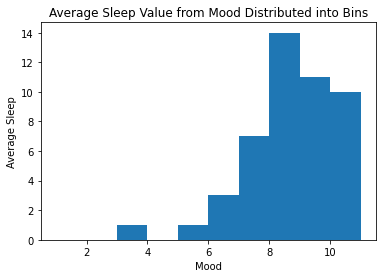

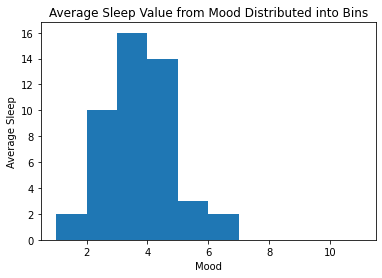

In [15]:
import matplotlib.pyplot as plt

# Group the data by mood and calculate the average sleep value
grouped_df = stacked_df.groupby('Mood')['Sleep (hrs)'].mean()

# Create bins of size 1 from 1-10
bins = range(1, 12)

# Plot the average sleep value distributed into bins
grouped_df.plot(kind='hist', bins=bins)

# Set the labels and title
plt.xlabel('Mood')
plt.ylabel('Average Sleep')
plt.title('Average Sleep Value from Mood Distributed into Bins')

# Show the plot
plt.show()


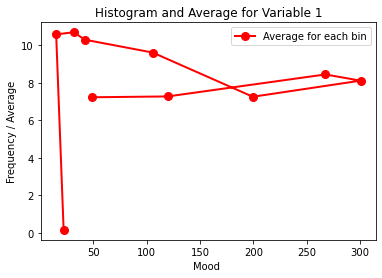

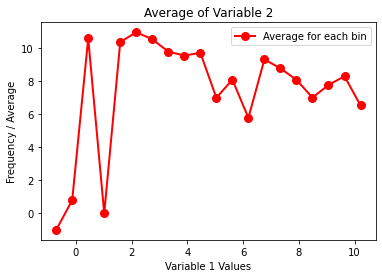

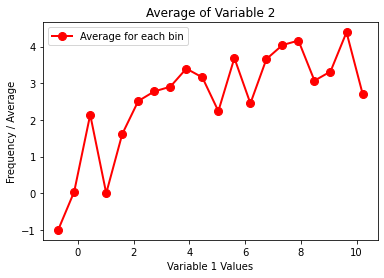

In [52]:
import numpy as np
hist, bin_edges = np.histogram(stacked_df['Mood'], bins=20)

# Calculate the average for variable2 for each bin
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_avgs = np.zeros_like(bin_centers)
for i in range(len(bin_centers)):
    indices_in_bin = np.where((stacked_df['Mood'] >= bin_edges[i]) & (stacked_df['Mood'] < bin_edges[i + 1]))
    if indices_in_bin[0].size > 0:
        stacked_simple = [stacked_df.iloc[k]['Sleep (hrs)'] for k in indices_in_bin[0]]
        bin_avgs[i] = np.mean(stacked_simple)
    
# Plot the histogram
#plt.hist(stacked_df['Mood'], bins=20, color='blue', alpha=0.7, label='Variable 1')

# Plot the average values as a line on top of the histogram
plt.plot(bin_centers, bin_avgs, color='red', marker='o', linestyle='-', linewidth=2, markersize=8, label='Average for each bin')

# Customize the plot
plt.title('Average of Variable 2')
plt.xlabel('Variable 1 Values')
plt.ylabel('Frequency / Average')
plt.legend()

# Show the plot
plt.show()

hist, bin_edges = np.histogram(stacked_df['Mood'], bins=20)

# Calculate the average for variable2 for each bin
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_avgs = np.zeros_like(bin_centers)
for i in range(len(bin_centers)):
    indices_in_bin = np.where((stacked_df['Mood'] >= bin_edges[i]) & (stacked_df['Mood'] < bin_edges[i + 1]))
    if indices_in_bin[0].size > 0:
        stacked_simple = [stacked_df.iloc[k]['Phone Usage (hrs)'] for k in indices_in_bin[0]]
        bin_avgs[i] = np.mean(stacked_simple)
    
# Plot the histogram
#plt.hist(stacked_df['Mood'], bins=20, color='blue', alpha=0.7, label='Variable 1')

# Plot the average values as a line on top of the histogram
plt.plot(bin_centers, bin_avgs, color='red', marker='o', linestyle='-', linewidth=2, markersize=8, label='Average for each bin')

# Customize the plot
plt.title('Average of Variable 2')
plt.xlabel('Variable 1 Values')
plt.ylabel('Frequency / Average')
plt.legend()

# Show the plot
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import mode

train_df, test_df = train_test_split(stacked_df, test_size=0.2, random_state=42)

print(train_df.columns.tolist())
# Print the shapes of the training and test datasets
print("Training dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

# Separate the features and target variables
y_train = train_df['Mood']
X_train = train_df.drop(columns=['Mood'])

y_test = test_df['Mood']
X_test = test_df.drop(columns=['Mood'])

# Example 1: Linear Regression with default parameters
model_default = LinearRegression()
model_default.fit(X_train, y_train)
y_pred_default = model_default.predict(X_test)

mse_default = mean_squared_error(y_test, y_pred_default)
print("Default Mean Squared Error:", mse_default)
r2_default = r2_score(y_test, y_pred_default)
print("Default R-squared:", r2_default)

# Example 2: Linear Regression without intercept
model_no_intercept = LinearRegression(fit_intercept=False)
model_no_intercept.fit(X_train, y_train)
y_pred_no_intercept = model_no_intercept.predict(X_test)
mse_no_intercept = mean_squared_error(y_test, y_pred_no_intercept)
print("No Intercept Mean Squared Error:", mse_default)
r2_no_intercept = r2_score(y_test, y_pred_no_intercept)
print("No Intercept R-squared:", r2_no_intercept)

# Example 3: Linear Regression with normalization
model_normalized = LinearRegression(normalize=True)
model_normalized.fit(X_train, y_train)
y_pred_normalized = model_normalized.predict(X_test)
mse_normalized = mean_squared_error(y_test, y_pred_normalized)
print("Normalized Mean Squared Error:", mse_normalized)
r2_normalized = r2_score(y_test, y_pred_normalized)
print("Normalized R-squared:", r2_normalized)

['Mood', 'Sleep (hrs)', 'Phone Usage (hrs)', 'Productivity (hrs)', 'Productivity', 'Solitude', 'Exercise', 'Leetcode', 'Journal', 'Profile Pic', 'Bad Habit', 'Other (hrs)', 'Duolingo', 'Exercise (hrs)', 'Media', 'Solitude_Exists', 'Exercise_Exists', 'Leetcode_Exists', 'Journal_Exists', 'Profile Pic_Exists', 'Bad Habit_Exists', 'Productivity_Exists', 'Media_Exists', 'Duolingo_Exists', 'Exercise (hrs)_Exists', 'Mood_Exists', 'Other (hrs)_Exists', 'Phone Usage (hrs)_Exists', 'Productivity (hrs)_Exists', 'Sleep (hrs)_Exists', 'Mood_lag1', 'Mood_lag2']
Training dataset shape: (946, 32)
Test dataset shape: (237, 32)
Default Mean Squared Error: 1.3723188351606748
Default R-squared: 0.6376778749359884
No Intercept Mean Squared Error: 1.3723188351606748
No Intercept R-squared: 0.6376778749359884
Normalized Mean Squared Error: 1.3723188351606743
Normalized R-squared: 0.6376778749359886


Text(0.5, 1.0, 'Actual vs Predicted Mood - Normalized')

<Figure size 720x720 with 0 Axes>

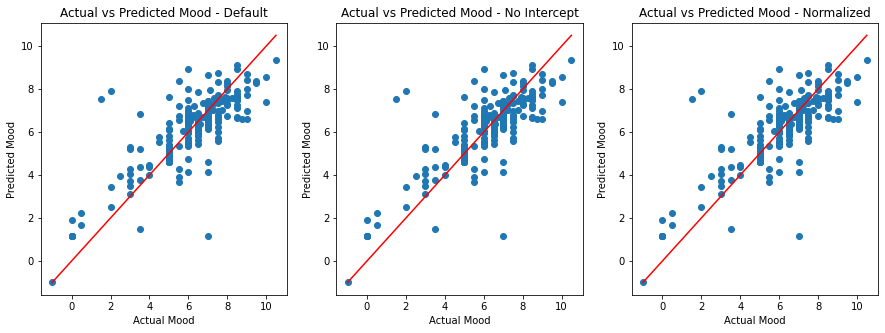

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot
axes[0].scatter(y_test, y_pred_default)
# plot line between actual and predicted values
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')

axes[0].set_xlabel('Actual Mood')
axes[0].set_ylabel('Predicted Mood')
axes[0].set_title('Actual vs Predicted Mood - Default')

# Scatter plot
axes[1].scatter(y_test, y_pred_no_intercept)
# plot line between actual and predicted values
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')

axes[1].set_xlabel('Actual Mood')
axes[1].set_ylabel('Predicted Mood')
axes[1].set_title('Actual vs Predicted Mood - No Intercept')

# Scatter plot
axes[2].scatter(y_test, y_pred_normalized)
# plot line between actual and predicted values
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')

axes[2].set_xlabel('Actual Mood')
axes[2].set_ylabel('Predicted Mood')
axes[2].set_title('Actual vs Predicted Mood - Normalized')

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Set y to be the 'Mood' column
y = stacked_df['Mood'].values

# Preprocess the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stacked_df.drop(columns=['Mood']).values)

# Split the data into features and target variables
X = scaled_data

# Reshape the data for CNN input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""
# Build the CNN model with additional layers
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')
"""
# Model with varied parameters - Variation 1
model_1 = Sequential()
model_1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
model_1.add(MaxPooling1D(pool_size=2))
model_1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_1.add(MaxPooling1D(pool_size=2))
model_1.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model_1.add(MaxPooling1D(pool_size=2))
model_1.add(Flatten())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(1))

# Compile the model
model_1.compile(optimizer='adam', loss='mse')
# Model with varied parameters - Variation 2
model_2 = Sequential()
model_2.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
model_2.add(MaxPooling1D(pool_size=2))
model_2.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_2.add(MaxPooling1D(pool_size=2))
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(1))

# Compile the model
model_2.compile(optimizer='adam', loss='mse')


# Model with varied parameters - Variation 3
model_3 = Sequential()
model_3.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
model_3.add(MaxPooling1D(pool_size=2))
model_3.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_3.add(MaxPooling1D(pool_size=2))
model_3.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model_3.add(MaxPooling1D(pool_size=2))
model_3.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model_3.add(MaxPooling1D(pool_size=1)) 
model_3.add(Flatten())
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(1))

# Compile the model
model_3.compile(optimizer='adam', loss='mse')


# Train the model
model_1.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))
model_2.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))
model_3.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))
# Predict on the test data
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)
# Calculate R-squared score
r2_1 = r2_score(y_test, y_pred_1)
print("R-squared model 1:", r2_1)
r2_2 = r2_score(y_test, y_pred_2)
print("R-squared model 2:", r2_2)
r2_3 = r2_score(y_test, y_pred_3)
print("R-squared model 3:", r2_3)

mse_1 = mean_squared_error(y_test, y_pred_1)
print("Normalized Mean Squared Error model 1:", mse_1)
mse_2 = mean_squared_error(y_test, y_pred_2)
print("Normalized Mean Squared Error model 2:", mse_2)
mse_3 = mean_squared_error(y_test, y_pred_3)
print("Normalized Mean Squared Error model 3:", mse_3)

Train on 946 samples, validate on 237 samples
Epoch 1/20
946/946 [==============================] - 1s 895us/sample - loss: 27.0260 - val_loss: 6.9648
Epoch 2/20
946/946 [==============================] - 0s 128us/sample - loss: 8.0752 - val_loss: 6.3969
Epoch 3/20
946/946 [==============================] - 0s 80us/sample - loss: 6.2235 - val_loss: 4.6354
Epoch 4/20
946/946 [==============================] - 0s 78us/sample - loss: 5.1080 - val_loss: 3.9885
Epoch 5/20
946/946 [==============================] - 0s 86us/sample - loss: 4.4111 - val_loss: 3.6309
Epoch 6/20
946/946 [==============================] - 0s 89us/sample - loss: 3.8263 - val_loss: 3.2075
Epoch 7/20
946/946 [==============================] - 0s 73us/sample - loss: 3.1700 - val_loss: 2.7952
Epoch 8/20
946/946 [==============================] - 0s 81us/sample - loss: 2.5680 - val_loss: 2.3256
Epoch 9/20
946/946 [==============================] - 0s 82us/sample - loss: 1.9967 - val_loss: 1.8224
Epoch 10/20
946/946 [===

Text(0.5, 1.0, 'Actual vs Predicted Mood - Variation 3')

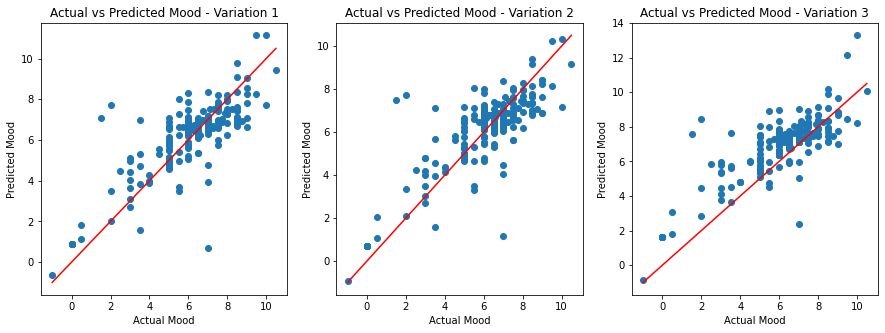

In [12]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
# Scatter plot
axes[0].scatter(y_test, y_pred_1)
# plot line between actual and predicted values
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')

axes[0].set_xlabel('Actual Mood')
axes[0].set_ylabel('Predicted Mood')
axes[0].set_title('Actual vs Predicted Mood - Variation 1')

# Scatter plot
axes[1].scatter(y_test, y_pred_2)
# plot line between actual and predicted values
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')

axes[1].set_xlabel('Actual Mood')
axes[1].set_ylabel('Predicted Mood')
axes[1].set_title('Actual vs Predicted Mood - Variation 2')

# Scatter plot
axes[2].scatter(y_test, y_pred_3)
# plot line between actual and predicted values
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')

axes[2].set_xlabel('Actual Mood')
axes[2].set_ylabel('Predicted Mood')
axes[2].set_title('Actual vs Predicted Mood - Variation 3')
